In [1]:
import pandas as pd
import numpy as np
import random
from scipy.spatial import distance, ConvexHull
import matplotlib.pyplot as plt

In [2]:
# # Define parameters
# min_distance = 126
# tournament_size = 5
# target_coverage_area = 800000
# turbine_diameter = 126
# mutation_rate = 0.02

# def initialize_populations():
#     return [pd.read_csv('./Population_1.csv'), pd.read_csv('./Population_2.csv'), pd.read_csv('./Population_3.csv'),
#             pd.read_csv('./Population_11.csv'), pd.read_csv('./Population_12.csv'), pd.read_csv('./Population_13.csv')]

# def calculate_fitness(df):
#     total_coverage_area = len(df) * np.pi * (turbine_diameter / 2)**2
#     fitness = total_coverage_area / target_coverage_area

#     coordinates = df[['Layout_x', 'Layout_y']].values
#     for i in range(len(coordinates)):
#         for j in range(i+1, len(coordinates)):
#             if distance.euclidean(coordinates[i], coordinates[j]) < min_distance:
#                 fitness *= 0.9  # Apply penalty

#     return fitness

# def tournament_selection(populations):
#     tournament = random.sample(populations, tournament_size)
#     return max(tournament, key=calculate_fitness)

# def crossover(parent1, parent2):
#     child = parent1.copy()
#     for column in child.columns:
#         child[column] = np.where(np.random.rand(len(child)) < 0.5, parent1[column], parent2[column])
#     return child

# def mutate(df):
#     for i in range(len(df)):
#         if np.random.rand() < mutation_rate:
#             for j in range(i+1, len(df)):
#                 while True:
#                     # Generate a new position within the range [D, 5D] from the current position
#                     new_x = df.loc[j, 'Layout_x'] + min_distance * (1 + 4 * np.random.rand())
#                     new_y = df.loc[j, 'Layout_y'] + min_distance * (1 + 4 * np.random.rand())
#                     if distance.euclidean([new_x, new_y], df.loc[j, ['Layout_x', 'Layout_y']]) >= min_distance:
#                         df.loc[i, 'Layout_x'] = int(new_x)
#                         df.loc[i, 'Layout_y'] = int(new_y)
#                         break
#     return df

# def run_genetic_algorithm(populations):
#     for _ in range(20):
#         next_gen = []
#         for _ in range(len(populations)):
#             parent1 = tournament_selection(populations)
#             parent2 = tournament_selection(populations)
#             child = crossover(parent1, parent2)
#             child = mutate(child)
#             next_gen.append(child)
#         populations = next_gen

#     # Sort populations by fitness and return the top 1
#     populations.sort(key=calculate_fitness, reverse=True)
#     return populations[0]  # Return only the best layout

# def plot_best_layout(best_layout):
#     fig, ax = plt.subplots(figsize=(5, 5))  # Adjust subplot configuration
#     ax.scatter(best_layout['Layout_x'], best_layout['Layout_y'], c='b', s=200)
#     ax.set_title('Best Layout')
#     plt.tight_layout()
#     plt.show()

# def main():
#     populations = initialize_populations()
#     best_layout = run_genetic_algorithm(populations)  # Get only the best layout
#     plot_best_layout(best_layout)  # Plot only the best layout
#     print(best_layout)

# if __name__ == "__main__":
#     main()

In [3]:
# import numpy as np
# import pandas as pd
# import random
# from scipy.spatial import distance

# # Define parameters
# min_distance = 126
# tournament_size = 5
# target_coverage_area = 800000
# turbine_diameter = 126
# mutation_rate = 0.02

# def initialize_populations():
#     populations = []
#     for _ in range(6):  # Generate 6 initial populations
#         num_turbines = np.random.randint(2, 11)  # Random number of turbines between 2 and 10
#         layout = pd.DataFrame(np.random.rand(num_turbines, 2), columns=['Layout_x', 'Layout_y'])
#         populations.append(layout)
#     return populations

# def calculate_fitness(df):
#     total_coverage_area = len(df) * np.pi * (turbine_diameter / 2)**2
#     fitness = total_coverage_area / target_coverage_area

#     coordinates = df[['Layout_x', 'Layout_y']].values
#     for i in range(len(coordinates)):
#         for j in range(i+1, len(coordinates)):
#             if distance.euclidean(coordinates[i], coordinates[j]) < min_distance:
#                 fitness *= 0.9  # Apply penalty

#     return fitness

# def tournament_selection(populations):
#     tournament = random.sample(populations, tournament_size)
#     return max(tournament, key=calculate_fitness)

# def crossover(parent1, parent2):
#     min_length = min(len(parent1), len(parent2))
#     child = parent1.copy()

#     for column in child.columns:
#         random_mask = np.random.rand(min_length) < 0.5
#         child_vals = np.where(random_mask, parent1[column][:min_length], parent2[column][:min_length])
#         child[column][:min_length] = child_vals

#     return child

# def mutate(df):
#     if np.random.rand() < mutation_rate:
#         if len(df) > 2:  # If there are more than 2 turbines, remove one with a certain probability
#             df = df.drop(np.random.choice(df.index))
#         elif len(df) < 10:  # If there are less than 10 turbines, add one with a certain probability
#             new_turbine = pd.DataFrame(np.random.rand(1, 2), columns=['Layout_x', 'Layout_y'])
#             df = df.append(new_turbine, ignore_index=True)
#     return df



# def calculate_enclosed_area(layout):
#     points = layout[['Layout_x', 'Layout_y']].values
#     hull = ConvexHull(points)
#     return hull.area

# def run_genetic_algorithm(populations):
#     for _ in range(20):
#         next_gen = []
#         for _ in range(len(populations)):
#             parent1 = tournament_selection(populations)
#             parent2 = tournament_selection(populations)
#             child = crossover(parent1, parent2)
#             child = mutate(child)
#             next_gen.append(child)
#         populations = next_gen

#     # Sort populations by fitness
#     populations.sort(key=calculate_fitness, reverse=True)

#     # Return the layout with an enclosed area close to 800,000 sq meters if one exists
#     for population in populations:
#         if abs(calculate_enclosed_area(population) - 800000) < 10000:  # Tolerance of 10,000 sq meters
#             return population

#     # If no suitable layout is found, return the layout with the highest fitness
#     return populations[0]

# def plot_best_layout(best_layout):
#     fig, ax = plt.subplots(figsize=(5, 5))  # Adjust subplot configuration
#     ax.scatter(best_layout['Layout_x'], best_layout['Layout_y'], c='b', s=200)
#     ax.set_title('Best Layout')
#     plt.tight_layout()
#     plt.show()

# def plot_best_layouts(best_layout):
#     fig, ax = plt.subplots(figsize=(5, 5))  # Adjust subplot configuration
#     ax.scatter(best_layout['Layout_x'], best_layout['Layout_y'], c='b', s=200)

#     # Calculate and plot Convex Hull
#     points = best_layout[['Layout_x', 'Layout_y']].values
#     hull = ConvexHull(points)
#     for simplex in hull.simplices:
#         ax.plot(points[simplex, 0], points[simplex, 1], 'k-')

#     # Shade the area enclosed by the Convex Hull
#     ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.3)

#     ax.set_title('Best Layout')
#     plt.tight_layout()
#     plt.show()

# def calculate_enclosed_area(df):
#     points = df[['Layout_x', 'Layout_y']].values
#     hull = ConvexHull(points)
#     return hull.volume

    
# def main():
#     populations = initialize_populations()
#     best_layout = run_genetic_algorithm(populations)  # Get only the best layout

#     if best_layout is not None:
#         plot_best_layout(best_layout)  # Plot only if the best layout is found
#         print(best_layout)
#     else:
#         print("No suitable layout found.")

# if __name__ == "__main__":
#     main()

## Optimized Layouts

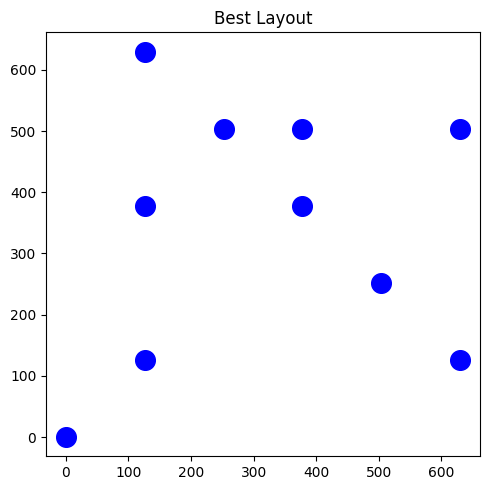

   Layout_x  Layout_y
0         0         0
1       378       504
2       126       378
3       630       504
4       126       630
5       378       378
6       126       126
7       252       504
8       630       126
9       504       252
Enclosed area:  285768.0


In [6]:
import numpy as np
import pandas as pd
import random
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

# Define parameters
min_distance = 126
tournament_size = 5
target_coverage_area = 800000
turbine_diameter = 126
mutation_rate = 0.02

def initialize_populations():
    populations = []
    for _ in range(6):  # Generate 6 initial populations
        num_turbines = np.random.randint(3, 11)  # Random number of turbines between 3 and 10
        layout = pd.DataFrame(np.random.randint(1, 6, size=(num_turbines, 2)) * 126, columns=['Layout_x', 'Layout_y'])  # Generate coordinates that are multiples of 126 meters
        layout.iloc[0] = [0, 0]  # Set the first turbine at the origin
        populations.append(layout)
    return populations

def calculate_fitness(df):
    total_coverage_area = len(df) * np.pi * (turbine_diameter / 2)**2
    fitness = total_coverage_area / target_coverage_area

    coordinates = df[['Layout_x', 'Layout_y']].values
    for i in range(len(coordinates)):
        for j in range(i+1, len(coordinates)):
            if np.linalg.norm(coordinates[i] - coordinates[j]) < min_distance:
                fitness *= 0.9  # Apply penalty

    return fitness

def tournament_selection(populations):
    tournament = random.sample(populations, tournament_size)
    return max(tournament, key=calculate_fitness)

def crossover(parent1, parent2):
    min_length = min(len(parent1), len(parent2))
    child = parent1.copy()

    for column in child.columns:
        random_mask = np.random.rand(min_length) < 0.5
        child_vals = np.where(random_mask, parent1[column][:min_length], parent2[column][:min_length])
        child[column][:min_length] = child_vals

    return child

def mutate(df):
    if np.random.rand() < mutation_rate:
        if len(df) > 3:  # If there are more than 3 turbines, remove one with a certain probability
            df = df.drop(np.random.choice(df.index[1:]))  # Do not remove the turbine at the origin
        elif len(df) < 10:  # If there are less than 10 turbines, add one with a certain probability
            new_turbine = pd.DataFrame(np.random.randint(1, 6, size=(1, 2)) * 126, columns=['Layout_x', 'Layout_y'])  # Generate coordinates that are multiples of 126 meters
            while any((df[['Layout_x', 'Layout_y']] == new_turbine.values).all(axis=1)):  # Check if the new turbine is at the same location as any existing turbine
                new_turbine = pd.DataFrame(np.random.randint(1, 6, size=(1, 2)) * 126, columns=['Layout_x', 'Layout_y'])  # Generate new coordinates if the turbine is at the same location
            df = df.append(new_turbine, ignore_index=True)
    return df

def calculate_enclosed_area(layout):
    points = layout[['Layout_x', 'Layout_y']].values
    hull = ConvexHull(points)
    return hull.volume

def run_genetic_algorithm(populations):
    for _ in range(20):
        next_gen = []
        for _ in range(len(populations)):
            parent1 = tournament_selection(populations)
            parent2 = tournament_selection(populations)
            child = crossover(parent1, parent2)
            child = mutate(child)
            next_gen.append(child)
        populations = next_gen

    # Sort populations by fitness and enclosed area
    populations.sort(key=lambda p: (calculate_fitness(p), -calculate_enclosed_area(p)), reverse=True)

    # Return the first layout with an enclosed area not exceeding 800,000 sq meters
    for population in populations:
        if calculate_enclosed_area(population) <= 800000:
            return population

    # If all layouts exceed 800,000 sq meters, return the one with the smallest area
    return min(populations, key=calculate_enclosed_area)

def plot_best_layouts(best_layout):
    fig, ax = plt.subplots(figsize=(5, 5))  # Adjust subplot configuration
    ax.scatter(best_layout['Layout_x'], best_layout['Layout_y'], c='b', s=200)

    # Calculate and plot Convex Hull
    points = best_layout[['Layout_x', 'Layout_y']].values
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], 'k-')

    # Shade the area enclosed by the Convex Hull
    ax.fill(points[hull.vertices,0], points[hull.vertices,1], 'k', alpha=0.3)

    ax.set_title('Best Layout')
    plt.tight_layout()
    plt.show()

def plot_best_layout(best_layout):
    fig, ax = plt.subplots(figsize=(5, 5))  # Adjust subplot configuration
    ax.scatter(best_layout['Layout_x'], best_layout['Layout_y'], c='b', s=200)
    ax.set_title('Best Layout')
    plt.tight_layout()
    plt.show()

def main():
    populations = initialize_populations()
    best_layout = run_genetic_algorithm(populations)  # Get only the best layout

    plot_best_layout(best_layout)  # Plot only the best layout
    print(best_layout)
    print("Enclosed area: ", calculate_enclosed_area(best_layout))

if __name__ == "__main__":
    main()

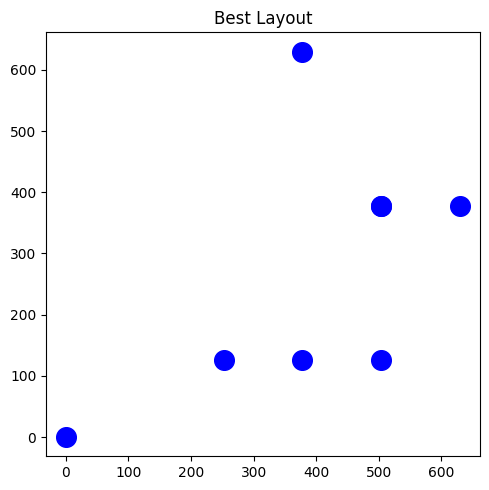

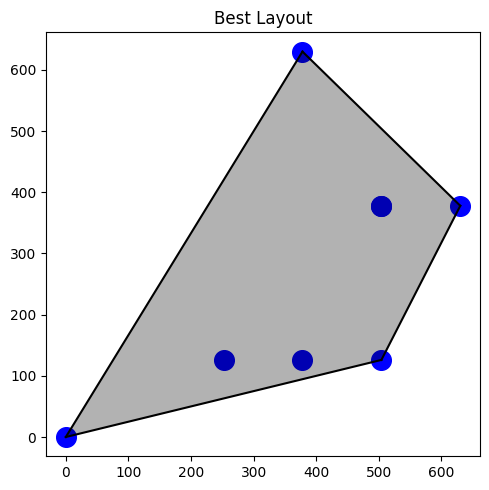

182574.00000000003


8

In [12]:
populations = initialize_populations()
best_layout = run_genetic_algorithm(populations)  # Get only the best layout
plot_best_layout(best_layout)  # Plot only the best layout
plot_best_layouts(best_layout)
print(calculate_enclosed_area(best_layout))
len(best_layout)

### With AEP Included